In [1]:
from quantum_texture import *
import random

We'll look at the spread of enemy influence on an 8x8 grid.

In [2]:
L = 8
grid = make_grid(L)

The enemy will initially reside at (0,0), with small influence also on neighbouring points.

In [15]:
height = {(x,y):0 for x in range(L) for y in range(L)}
height[0,0] = 1
for (x,y) in [(0,1),(1,0),(1,1)]:
    height[x,y] = 0*random.random()/4

Here's what this looks like.

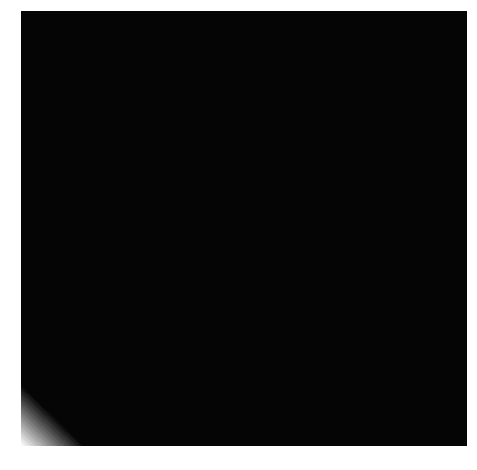

In [16]:
plot_height(height,color_map='gray')

Now we implement a quantum process to spread this influence out over a series of steps.

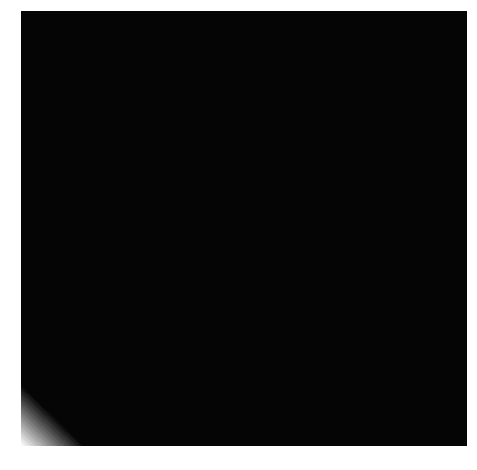

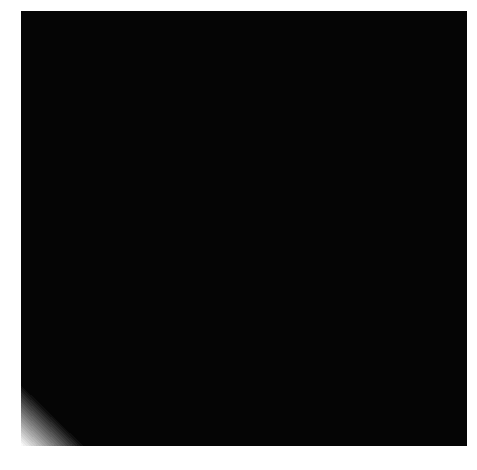

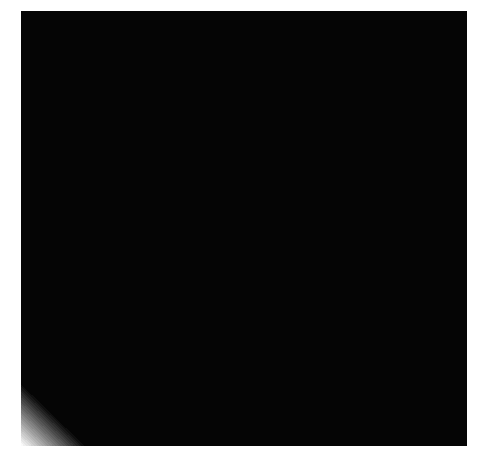

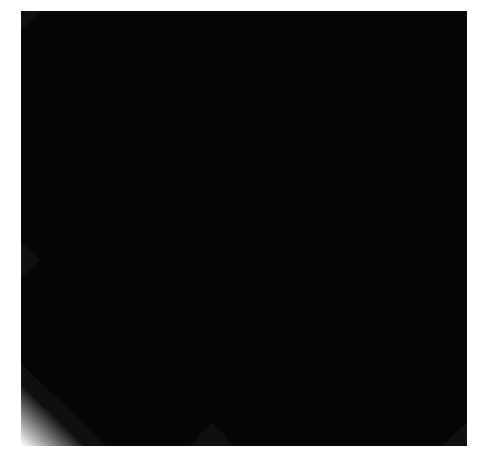

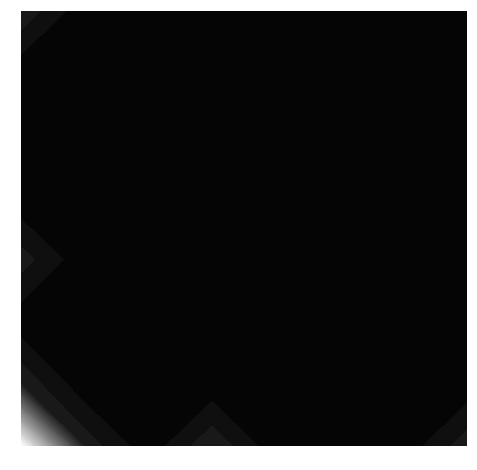

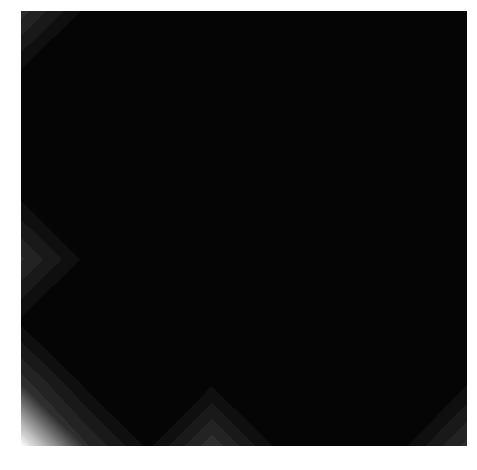

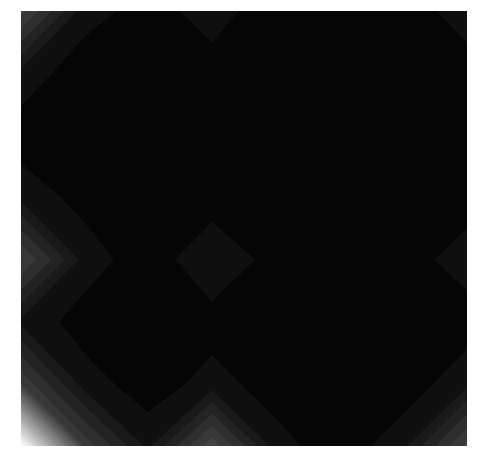

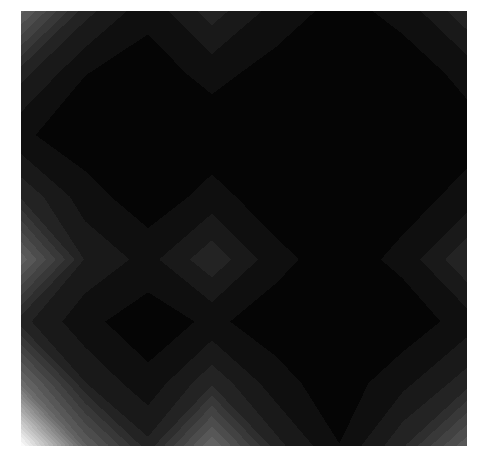

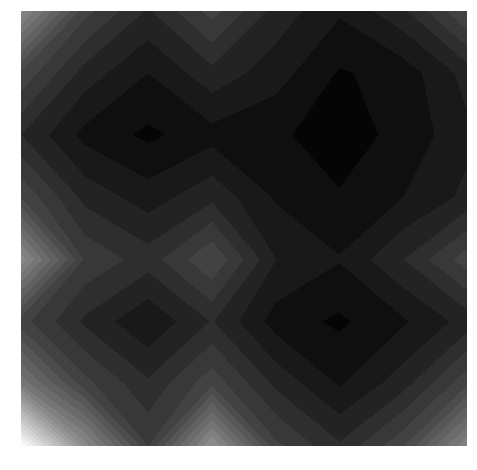

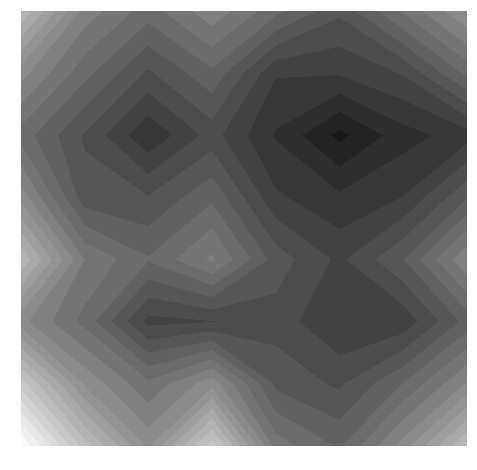

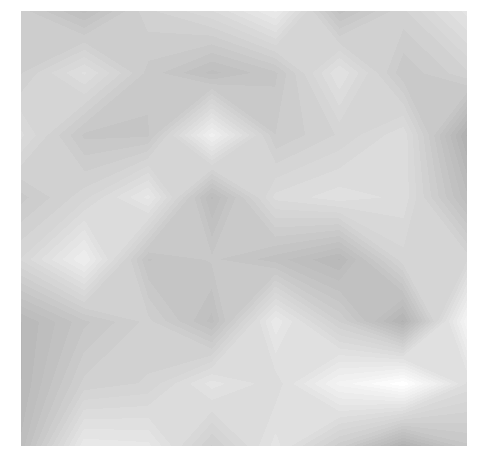

In [17]:
steps = 10

qc = height2circuit(height,grid)

for step in range(steps+1):

    qc = height2circuit(height,grid)
    qc.ry((pi/2)*(step/steps),qc.qregs[0])
    new_height = circuit2height(qc,grid,Aer.get_backend('qasm_simulator'))

    plot_height(new_height,color_map='gray')